# RaDialog

<Figure size 3500x1750 with 0 Axes>

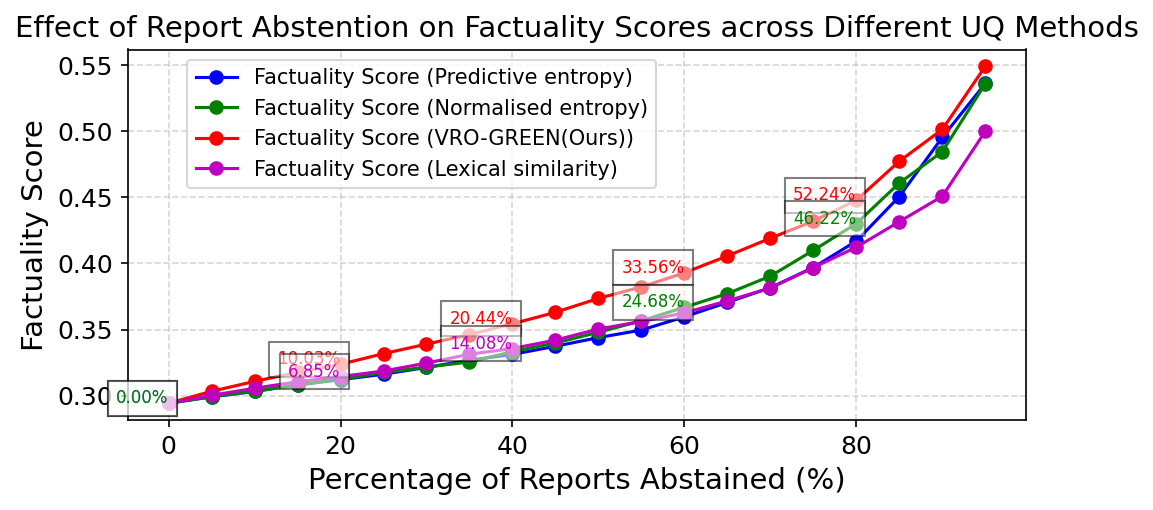

In [51]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.utils import calculate_accuracy_and_improvement

with open('/restricted/projectnb/batmanlab/chyuwang/RaDialog/exp/text_score/green_scores-3858.pkl', 'rb') as file:
    green_score = pickle.load(file)
# Load data
us = np.array([t.numpy() for t in green_score['greens']])
pe = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp/uncertainty/u_nll.csv')
u_nll = np.array(pe['u_nll'].values)

pe = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp/uncertainty/u_normnll.csv')
u_normnll = np.array(pe['u_normnll'].values)

with open('/restricted/projectnb/batmanlab/chyuwang/RaDialog/exp/uncertainty/green_uncertainty-3858.pkl', 'rb') as file:
    green_uncertainty = pickle.load(file)
ugreen = np.array([t.numpy() for t in green_uncertainty['uncertainty']])

# with open('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp/uncertainty/rad_report_3858.pkl', 'rb') as file:
#     Urad = pickle.load(file)
# Urad_mean = np.array([1 - np.mean(item) for item in Urad])

u_lexicalsim = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp_result/RaDialog/UQ/lexicalUQ.csv')
u_lexicalsim = u_lexicalsim['ROUGE_L_UQ'].values
u_lexicalsim = [1-i for i in u_lexicalsim]
# List of uncertainties and labels
uncertainties = [u_nll, u_normnll, ugreen, u_lexicalsim]
labels = ['Predictive entropy', 'Normalised entropy', 'VRO-GREEN(Ours)', 'Lexical similarity']
colors = ['b', 'g', 'r', 'm']

plt.figure(figsize=(7, 3.5), dpi=500)
all_annotations = {}  # Dictionary to store top 2 (y, imp) pairs for each x
for uncertainty, label, color in zip(uncertainties, labels, colors):
    all_acc, improvements = calculate_accuracy_and_improvement(uncertainty, us)
    
    for x, y, imp in zip(range(95, -5, -5), all_acc, improvements):
        if x % 20 == 0:  # Only process every 20% abstention
            # Collect (y, imp, color) for each x value
            if x not in all_annotations:
                all_annotations[x] = []
            all_annotations[x].append((y, imp, color))

# Step 2: Plot data and annotate only the top 2 improvements for each x
plt.figure(figsize=(7, 3.5), dpi=150)

# Plot each uncertainty line
for uncertainty, label, color in zip(uncertainties, labels, colors):
    all_acc, improvements = calculate_accuracy_and_improvement(uncertainty, us)
    
    # Plot the accuracy for this uncertainty measure
    plt.plot(range(95, -5, -5), all_acc, marker='o', linestyle='-', linewidth=1.5, color=color, label=f'Factuality Score ({label})')
    
# Annotate only the top 2 improvements for each x
for x, y_imp_pairs in all_annotations.items():
    # Sort by improvement and select the top 2
    top_2_pairs = sorted(y_imp_pairs, key=lambda pair: pair[1], reverse=True)[:2]
    
    # Annotate the top 2 improvements for each x with their corresponding color
    for y, imp, color in top_2_pairs:
        plt.text(x, y, f'{imp:.2%}', fontsize=8, ha='right', color=color, bbox=dict(facecolor='white', alpha=0.5))


plt.title('Effect of Report Abstention on Factuality Scores across Different UQ Methods', fontsize=14)
plt.xlabel('Percentage of Reports Abstained (%)', fontsize=14)
plt.ylabel('Factuality Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.6, 1))  # Move legend outside plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('figure2.png', format='png')
plt.show()
plt.close()

#  CheXpertPlus_mimiccxr

In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.utils import calculate_accuracy_and_improvement

In [6]:
score = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp_result/ChexpertPlus/green_scores-chexpert-plus-3858.csv',header=None)
ugreen = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp_result/ChexpertPlus/chexpert-plus-green_uncertainty-3858.csv',header=None)

score = np.array([float(t.replace("tensor(", "").replace(")", "")) for t in score[0].values])
ugreen = np.array([float(t.replace("tensor(", "").replace(")", "")) for t in ugreen[0].values])


In [7]:
from scipy.stats import pearsonr
pearsonr(score,ugreen)[0]

-0.4726145635334426

In [16]:
u_lexicalsim = pd.read_csv('/restricted/projectnb/batmanlab/chyuwang/rrg_factual_uncertainty/exp_result/ChexpertPlus/chexpert-plus_lexicalUQ.csv')
u_lexicalsim = u_lexicalsim['ROUGE_L_UQ'].values

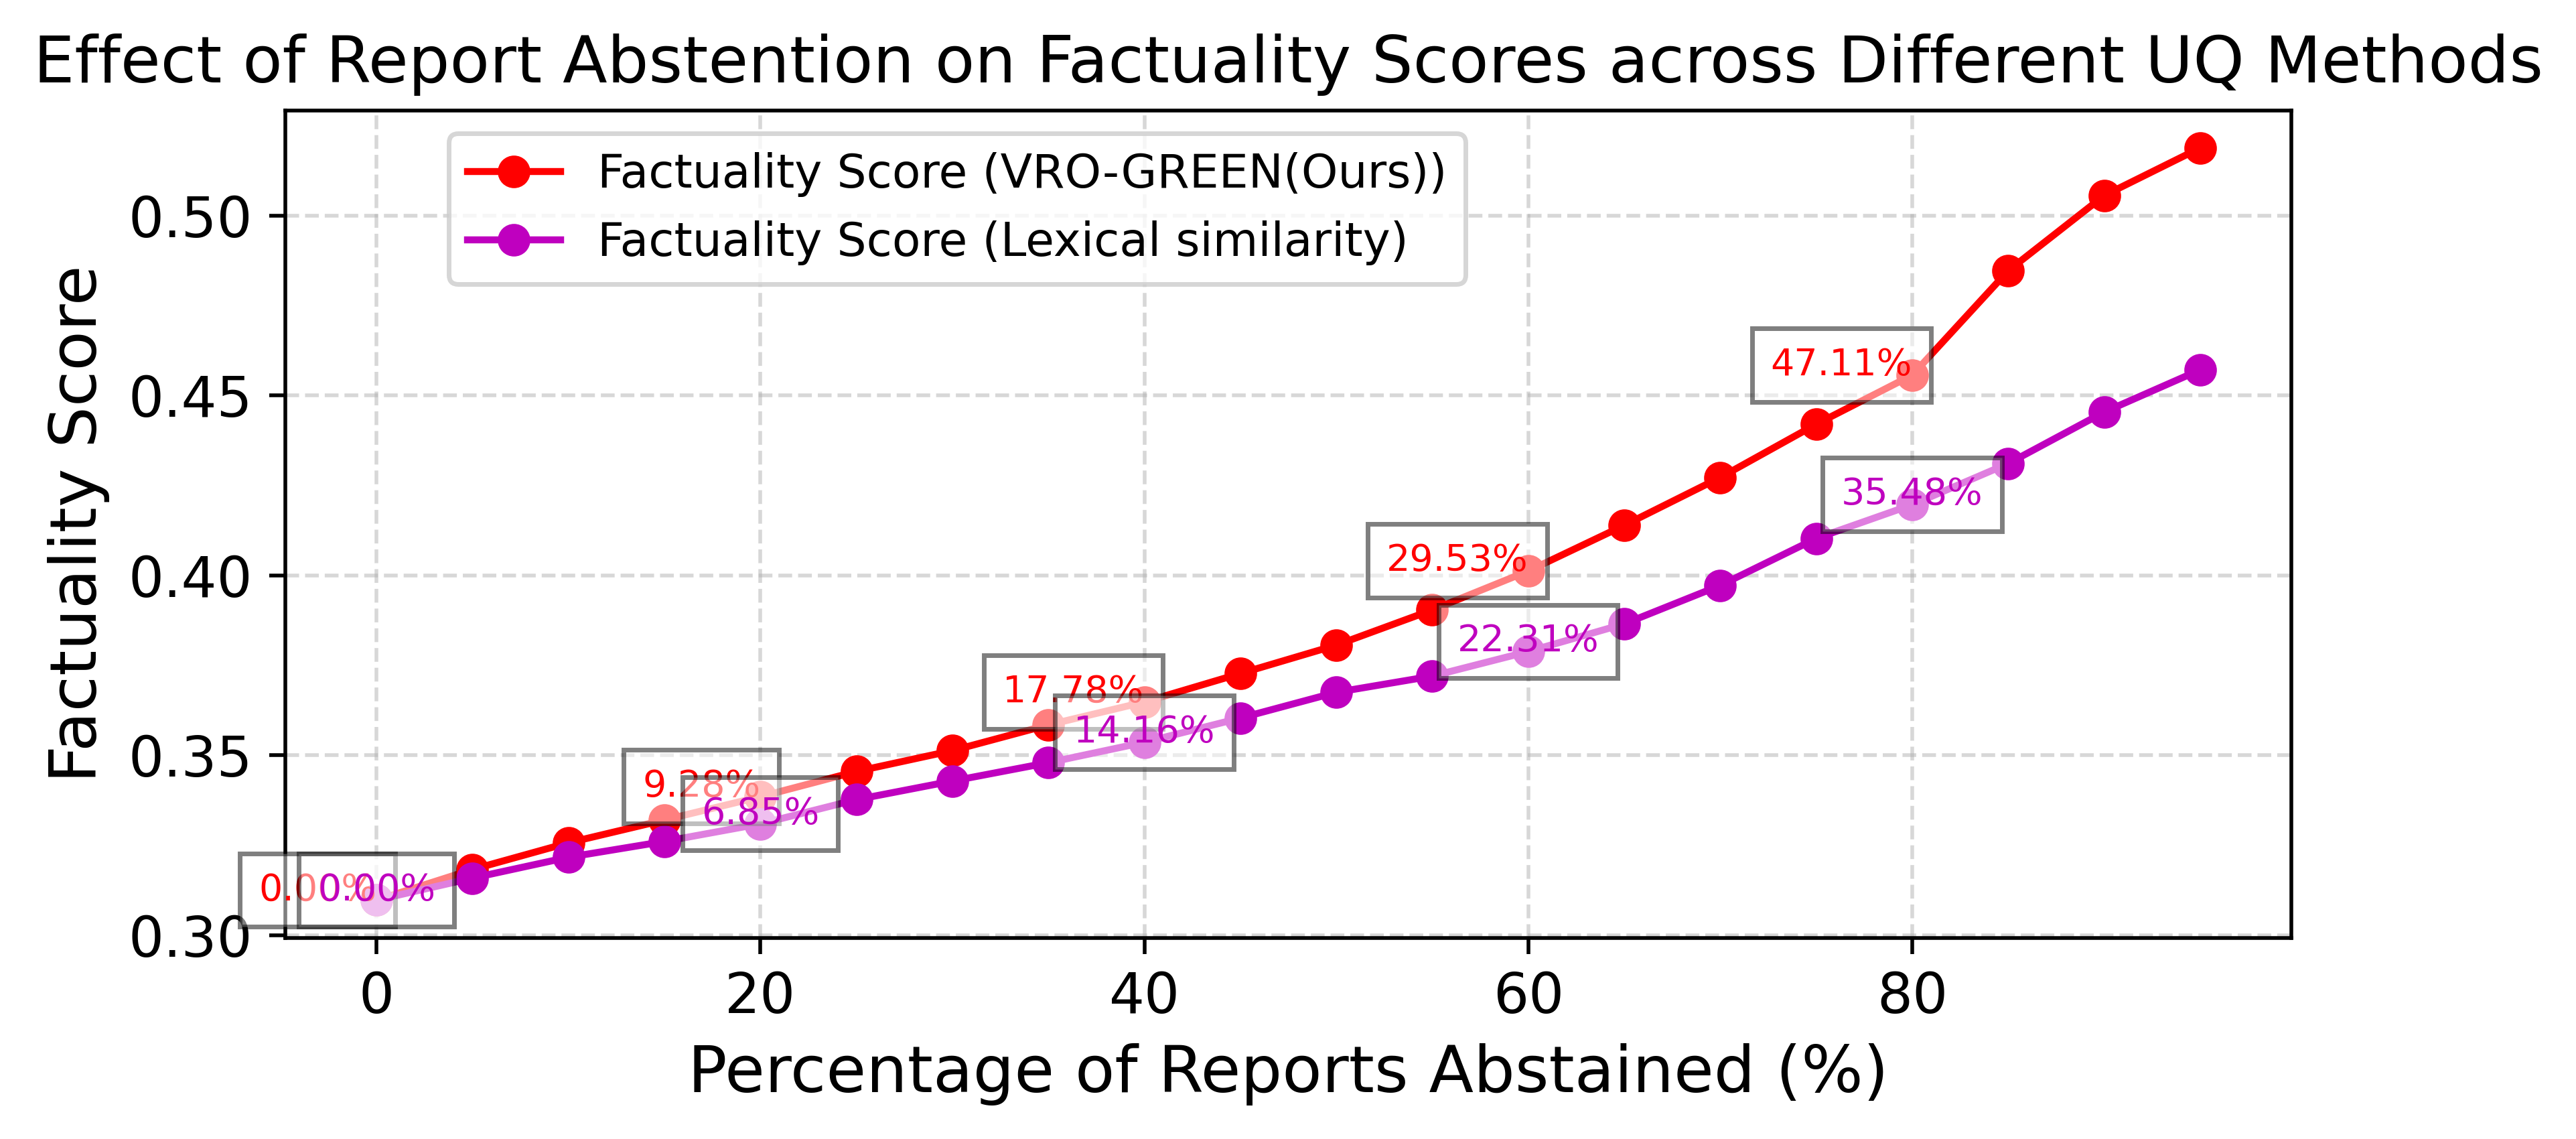

In [40]:
uncertainties = [ugreen, -u_lexicalsim]
labels = ['VRO-GREEN(Ours)', 'Lexical similarity']
colors = ['r', 'm']

plt.figure(figsize=(7, 3.5), dpi=500)

for uncertainty, label, color in zip(uncertainties, labels, colors):
    all_acc, improvements = calculate_accuracy_and_improvement(uncertainty, score)
    
    # Plot the accuracy for this uncertainty measure
    plt.plot(range(95, -5, -5), all_acc, marker='o', linestyle='-', linewidth=1.5, color=color, label=f'Factuality Score ({label})')
    
    # Reduce annotations to every 20% for clarity in smaller plot
    for x, y, imp in zip(range(95, -5, -5), all_acc, improvements):
        if x % 20 == 0:  # Only annotate every 20% abstention
            if color == 'r':
                plt.text(x, y, f'{imp:.2%}', fontsize=8, ha='right', color=color, bbox=dict(facecolor='white', alpha=0.5))
            else:
                plt.text(x, y, f'{imp:.2%}', fontsize=8, ha='center', color=color, bbox=dict(facecolor='white', alpha=0.5))


plt.title('Effect of Report Abstention on Factuality Scores across Different UQ Methods',fontsize=14)
plt.xlabel('Percentage of Reports Abstained (%)', fontsize=14)
plt.ylabel('Factuality Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, loc='upper right', bbox_to_anchor=(0.6, 1))  # Move legend outside plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('figure2.png', format='png')
plt.show()
plt.close()